# Importing Library / Loading Data

In [123]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
import math

from pylab import rcParams
rcParams['figure.figsize'] = 16,10

In [25]:
stock = pd.read_csv('IBM_Stock_Price.csv')

# Data Preperation & Vizulization

In [26]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.713333,7.713333,7.626667,7.626667,0.609973,387200
1,1962-01-03,7.626667,7.693333,7.626667,7.693333,0.615304,288000
2,1962-01-04,7.693333,7.693333,7.613333,7.616667,0.609173,256000
3,1962-01-05,7.606667,7.606667,7.453333,7.466667,0.597176,363200
4,1962-01-08,7.460000,7.460000,7.266667,7.326667,0.585979,544000


In [27]:
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
14730,2020-07-09,118.000000,118.000000,115.199997,115.709999,115.709999,4763000
14731,2020-07-10,115.500000,118.570000,115.290001,118.349998,118.349998,4285700
14732,2020-07-13,119.779999,120.989998,118.660004,119.199997,119.199997,4650700
14733,2020-07-14,118.620003,120.889999,117.919998,120.599998,120.599998,4534400
14734,2020-07-15,122.400002,123.959999,122.150002,123.000000,123.000000,4470600


In [28]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,1.473500e+04
mean,60.420493,60.981383,59.887878,60.439252,39.209210,4.866420e+06
std,57.347590,57.812178,56.914578,57.373050,49.643714,4.479769e+06
min,4.080000,4.286667,4.000000,4.080000,0.326410,0.000000e+00
25%,16.125000,16.234375,16.000000,16.125000,1.619472,1.335200e+06
50%,28.812500,29.031250,28.531250,28.812500,7.123168,4.118700e+06
75%,103.750000,105.250000,102.140000,103.610000,68.877437,6.844300e+06
max,215.380005,215.899994,214.300003,215.800003,163.324295,6.944470e+07


In [29]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14735 entries, 0 to 14734
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14735 non-null  object 
 1   Open       14735 non-null  float64
 2   High       14735 non-null  float64
 3   Low        14735 non-null  float64
 4   Close      14735 non-null  float64
 5   Adj Close  14735 non-null  float64
 6   Volume     14735 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 805.9+ KB


Date is in object, so need to convert into Date type

In [30]:
# Converting date into Datetime format
stock['Date'] = stock['Date'].apply(lambda date: pd.datetime.strptime(date, '%Y-%m-%d'))

C:\Users\psidd\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [31]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14735 entries, 0 to 14734
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14735 non-null  datetime64[ns]
 1   Open       14735 non-null  float64       
 2   High       14735 non-null  float64       
 3   Low        14735 non-null  float64       
 4   Close      14735 non-null  float64       
 5   Adj Close  14735 non-null  float64       
 6   Volume     14735 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 805.9 KB


### Plotting Open/Close/High/Low stock price over years

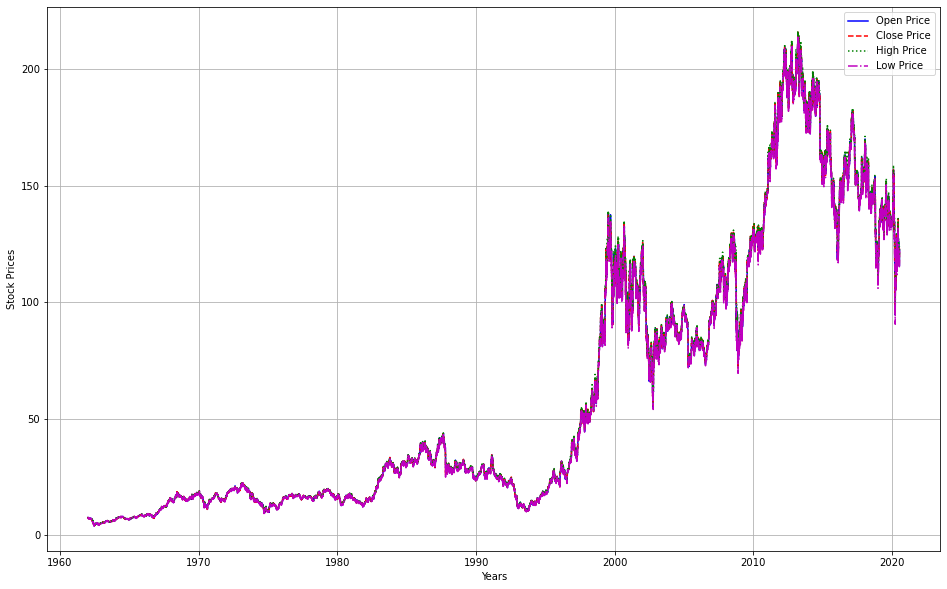

In [32]:
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Stock Prices')
plt.plot(stock['Date'], stock['Open'], 'b', label='Open Price')
plt.plot(stock['Date'], stock['Close'], 'r--', label='Close Price')
plt.plot(stock['Date'], stock['High'], 'g:', label='High Price')
plt.plot(stock['Date'], stock['Low'], 'm-.', label='Low Price')
plt.legend()
plt.show()

In [33]:
# Adding month, year and day column
stock_vis = stock.copy()
stock_vis['month'] = stock_vis['Date'].dt.month
stock_vis['year'] = stock_vis['Date'].dt.year
stock_vis['day'] = stock_vis['Date'].dt.day

In [34]:
stock_vis

,Date,Open,High,Low,Close,Adj Close,Volume,month,year,day
0,1962-01-02,7.713333,7.713333,7.626667,7.626667,0.609973,387200,1,1962,2
1,1962-01-03,7.626667,7.693333,7.626667,7.693333,0.615304,288000,1,1962,3
2,1962-01-04,7.693333,7.693333,7.613333,7.616667,0.609173,256000,1,1962,4
3,1962-01-05,7.606667,7.606667,7.453333,7.466667,0.597176,363200,1,1962,5
4,1962-01-08,7.460000,7.460000,7.266667,7.326667,0.585979,544000,1,1962,8
...,...,...,...,...,...,...,...,...,...,...
14730,2020-07-09,118.000000,118.000000,115.199997,115.709999,115.709999,4763000,7,2020,9
14731,2020-07-10,115.500000,118.570000,115.290001,118.349998,118.349998,4285700,7,2020,10
14732,2020-07-13,119.779999,120.989998,118.660004,119.199997,119.199997,4650700,7,2020,13
14733,2020-07-14,118.620003,120.889999,117.919998,120.599998,120.599998,4534400,7,2020,14


In [35]:
# Plot Month Based graph function
def plotMonthBased():
    month_group = stock_vis.groupby('month', as_index=False)[['Open', 'Volume']].mean()
    def toMonth(num):
        num = num-1
        month = ["January", "February", "March", "April", "May", "June", "July", "August",
                 "September", "October", "November", "December"]
        return month[num]
    month_group['month'] = month_group['month'].apply(toMonth)
    
    plt.grid(True)
    plt.xlabel('Month')
    plt.ylabel('Open Price / Stock Volumes')
    plt.plot(month_group['month'], month_group['Open'], label="Open Price", color='blue', marker='o')
    plt.plot(month_group['month'], month_group['Volume'], label="Volumes", color='red', marker='v', linestyle='--')
    plt.legend()
    plt.show()

In [36]:
# Plot Year Based graph function
def plotYearBased():
    year_group = stock_vis.groupby('year', as_index=False)[['Open', 'Volume']].mean()
    
    plt.grid(True)
    plt.xlabel('Year')
    plt.ylabel('Open Price / Stock Volumes')
    plt.plot(year_group['year'], year_group['Open'], label="Open Price", color='blue', marker='o')
    plt.plot(year_group['year'], year_group['Volume'], label="Volumes", color='red', marker='v', linestyle='--')
    plt.legend()
    plt.show()

In [37]:
# Plot Day based graph function
def plotDayBased():
    day_group = stock_vis.groupby('day', as_index=False)[['Open', 'Volume']].mean()
    
    plt.grid(True)
    plt.xlabel('Day')
    plt.ylabel('Open Price / Stock Volumes')
    plt.plot(day_group['day'], day_group['Open'], label="Open Price", color='blue', marker='o')
    plt.plot(day_group['day'], day_group['Volume'], label="Volumes", color='red', marker='v', linestyle='--')
    plt.legend()
    plt.show()

In [38]:
# Scaling Open stock price and Volume so we can visulize both graph together and look for relationship
sc = StandardScaler()
stock_vis[['Open', 'Volume']] = sc.fit_transform(stock_vis[['Open', 'Volume']])

### Plotting Average stock price and volumes for each Month (Values are standardised, so both plot can be compared)

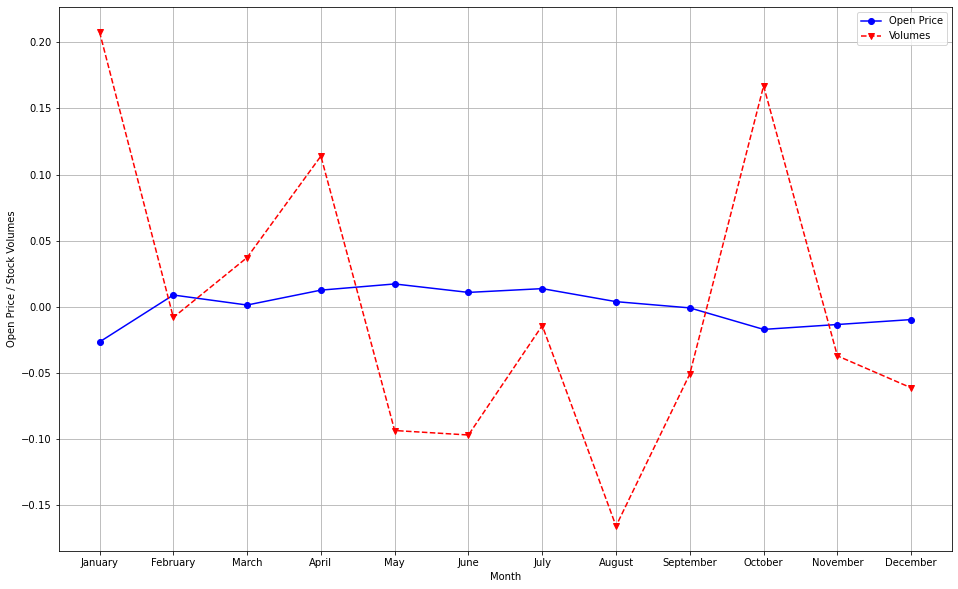

In [39]:
plotMonthBased()

### Plotting Average stock price and volumes over Years (Values are standardised, so both plot can be compared)

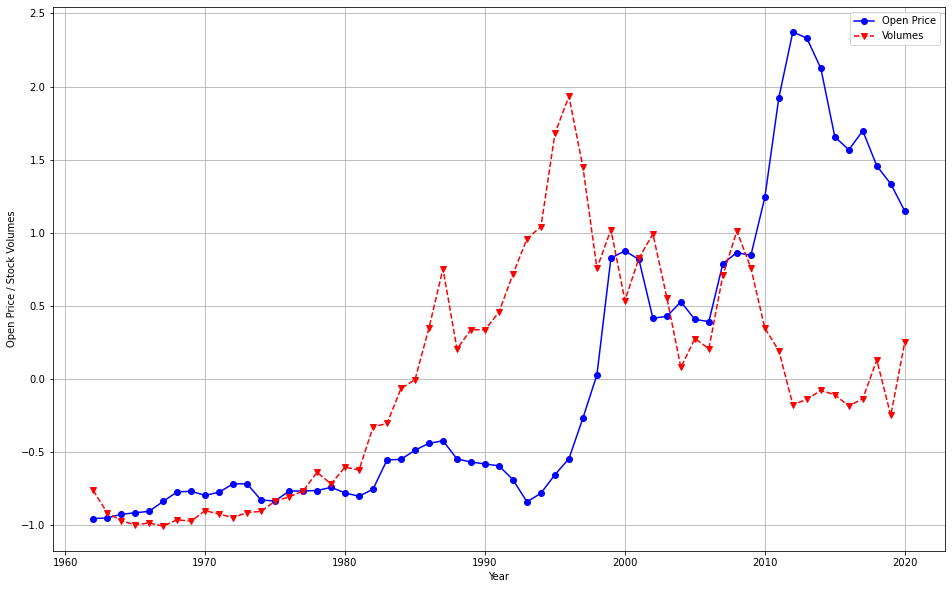

In [40]:
plotYearBased()

### Plotting Average stock price and volumes for each day of month (Values are standardised, so both plot can be compared)

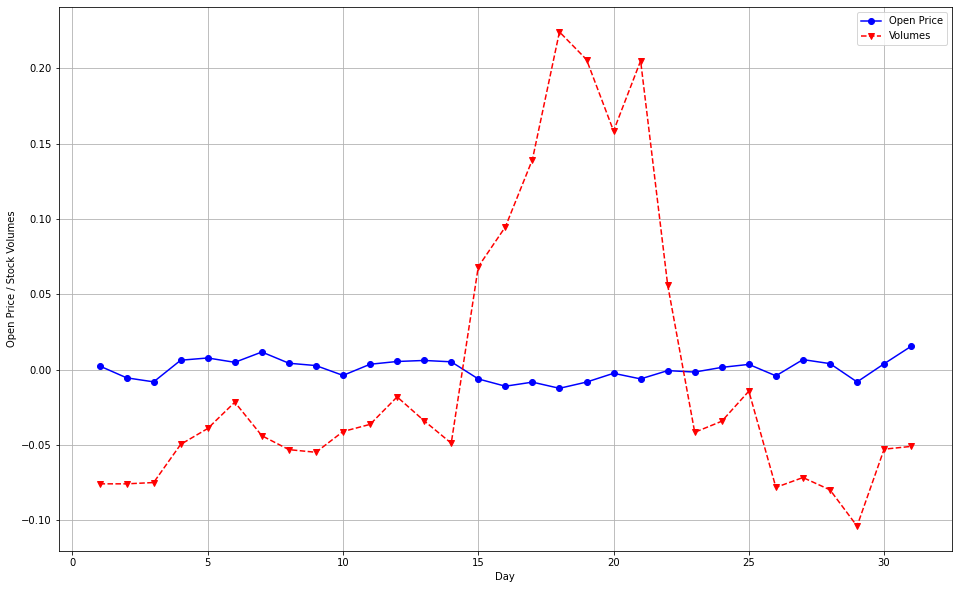

In [41]:
plotDayBased()

### Viewing Oberserved, Trend, Seasonal and Residual

In [42]:
stock_arima = stock['Open']
stock_arima.index = stock['Date']

In [43]:
decomposition = sm.tsa.seasonal_decompose(stock_arima[-800:], model='additive', period=12)
decomposition_observed = decomposition.observed
decomposition_trend = decomposition.trend
decomposition_seasonal = decomposition.seasonal
decomposition_residual = decomposition.resid

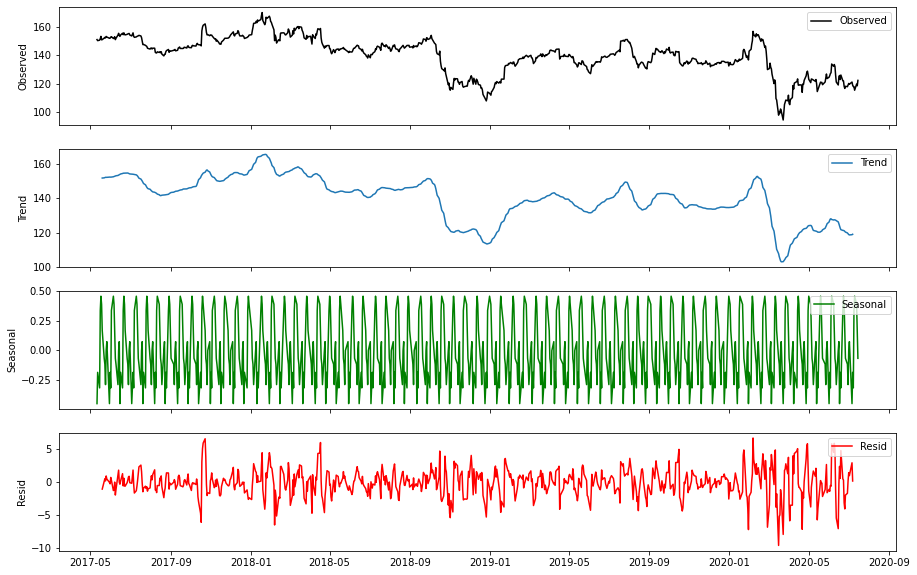

In [44]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(decomposition_observed, 'k', label='Observed')
axes[0].set_ylabel("Observed")
axes[0].legend(loc='upper right');

axes[1].plot(decomposition_trend, label='Trend')
axes[1].set_ylabel("Trend")
axes[1].legend(loc='upper right');

axes[2].plot(decomposition_seasonal, 'g', label='Seasonal')
axes[2].set_ylabel("Seasonal")
axes[2].legend(loc='upper right');

axes[3].plot(decomposition_residual, 'r', label='Resid')
axes[3].set_ylabel("Resid")
axes[3].legend(loc='upper right');

# LSMT Model (RNN)

### Splitting in Training and Testing set

In [45]:
# Splitting by year, pre 2011 is training and rest is test set
train_stock, test_stock = stock.iloc[:12336, 0:2], stock.iloc[12336:, 0:2]

### Plotting Training and Testing data

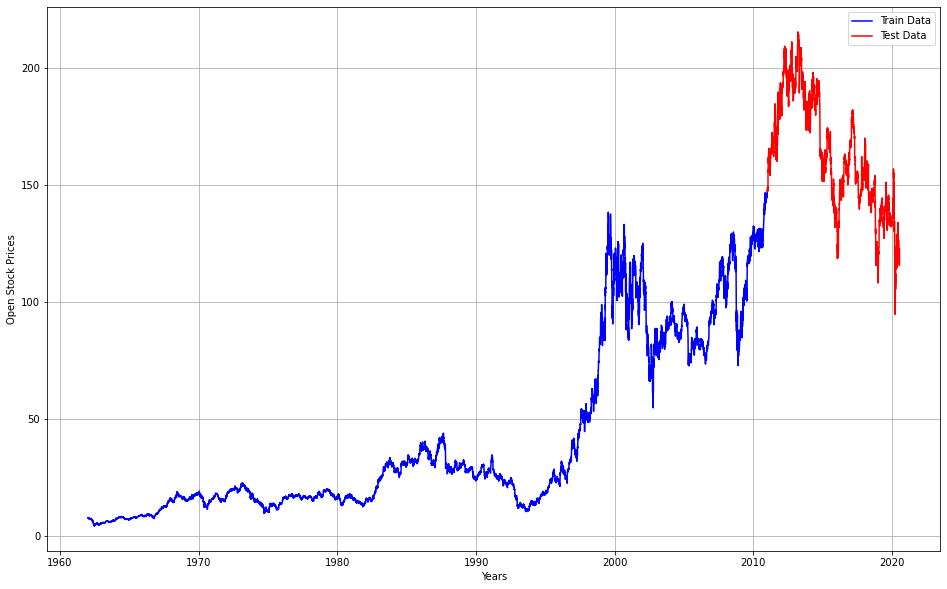

In [46]:
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Open Stock Prices')
plt.plot(train_stock['Date'], train_stock['Open'], 'b', label='Train Data')
plt.plot(test_stock['Date'], test_stock['Open'], 'r', label='Test Data')
plt.legend()
plt.show()

In [47]:
to_train = train_stock.iloc[:, 1:2].values

### Feature Scaling

In [48]:
mms = MinMaxScaler(feature_range=(0,1))
train_stock_scaled = mms.fit_transform(to_train)

### Creating X train and Y train

Since our X and Y values are same "Open Price", we will glance 60 day in future and that will be our independant variable.

In [49]:
X_train = []
y_train = []
for i in range(60, 12336):
    X_train.append(train_stock_scaled[i-60:i, 0])
    y_train.append(train_stock_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train, y_train

(array([[0.02547026, 0.02486272, 0.02533006, ..., 0.0223858 , 0.022526  ,
         0.0223858 ],
        [0.02486272, 0.02533006, 0.02472252, ..., 0.022526  , 0.0223858 ,
         0.02159131],
        [0.02533006, 0.02472252, 0.02369436, ..., 0.0223858 , 0.02159131,
         0.02182498],
        ...,
        [0.9193831 , 0.92604274, 0.93094994, ..., 0.99411148, 0.98871363,
         0.99004558],
        [0.92604274, 0.93094994, 0.93824046, ..., 0.98871363, 0.99004558,
         0.99488261],
        [0.93094994, 0.93824046, 0.94160531, ..., 0.99004558, 0.99488261,
         0.99740627]]),
 array([0.02159131, 0.02182498, 0.02159131, ..., 0.99488261, 0.99740627,
        1.        ]))

In [50]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.02547026],
        [0.02486272],
        [0.02533006],
        ...,
        [0.0223858 ],
        [0.022526  ],
        [0.0223858 ]],

       [[0.02486272],
        [0.02533006],
        [0.02472252],
        ...,
        [0.022526  ],
        [0.0223858 ],
        [0.02159131]],

       [[0.02533006],
        [0.02472252],
        [0.02369436],
        ...,
        [0.0223858 ],
        [0.02159131],
        [0.02182498]],

       ...,

       [[0.9193831 ],
        [0.92604274],
        [0.93094994],
        ...,
        [0.99411148],
        [0.98871363],
        [0.99004558]],

       [[0.92604274],
        [0.93094994],
        [0.93824046],
        ...,
        [0.98871363],
        [0.99004558],
        [0.99488261]],

       [[0.93094994],
        [0.93824046],
        [0.94160531],
        ...,
        [0.99004558],
        [0.99488261],
        [0.99740627]]])

### Building Model

In [51]:
lstm = Sequential()

In [52]:
lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

In [53]:
lstm.add(Dropout(0.2))

In [54]:
lstm.add(LSTM(units = 50, return_sequences = True))
lstm.add(Dropout(0.2))

In [55]:
lstm.add(LSTM(units = 50, return_sequences = True))
lstm.add(Dropout(0.2))

In [56]:
lstm.add(LSTM(units = 50))
lstm.add(Dropout(0.2))

In [57]:
lstm.add(Dense(units = 1))

In [58]:
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [59]:
# Running in batch size of 32 and epochs of 40.
lstm.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
384/384 [==============================] - 33s 87ms/step - loss: 0.0033
Epoch 2/40
384/384 [==============================] - 34s 87ms/step - loss: 0.0015
Epoch 3/40
384/384 [==============================] - 34s 89ms/step - loss: 0.0014
Epoch 4/40
384/384 [==============================] - 35s 92ms/step - loss: 0.0011
Epoch 5/40
384/384 [==============================] - 33s 87ms/step - loss: 0.0011
Epoch 6/40
384/384 [==============================] - 34s 89ms/step - loss: 0.0010
Epoch 7/40
384/384 [==============================] - 33s 87ms/step - loss: 8.6223e-04
Epoch 8/40
384/384 [==============================] - 33s 86ms/step - loss: 9.0052e-04
Epoch 9/40
384/384 [==============================] - 33s 86ms/step - loss: 8.3448e-04
Epoch 10/40
384/384 [==============================] - 33s 85ms/step - loss: 7.4342e-04
Epoch 11/40
384/384 [==============================] - 34s 88ms/step - loss: 7.7353e-04
Epoch 12/40
384/384 [==============================] - 34s 89ms/s

### Predicting result comparing with X_test and Visualizing results

In [63]:
real_stock_price = test_stock.iloc[:,1:2].values

In [66]:
stock_combine = pd.concat((train_stock['Open'], test_stock['Open']), axis = 0)

In [73]:
inputs = stock_combine[len(stock_combine) - len(test_stock) - 60:].values

In [76]:
inputs = inputs.reshape(-1,1)

In [77]:
inputs = mms.transform(inputs)

In [85]:
test_stock.shape[0]+60

2459

In [86]:
X_test = []
for i in range(60, 2459):
    X_test.append(inputs[i-60:i, 0])

In [88]:
X_test = np.array(X_test)

In [90]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [92]:
predicted_stock_price = lstm.predict(X_test)

In [93]:
predicted_stock_price = mms.inverse_transform(predicted_stock_price)

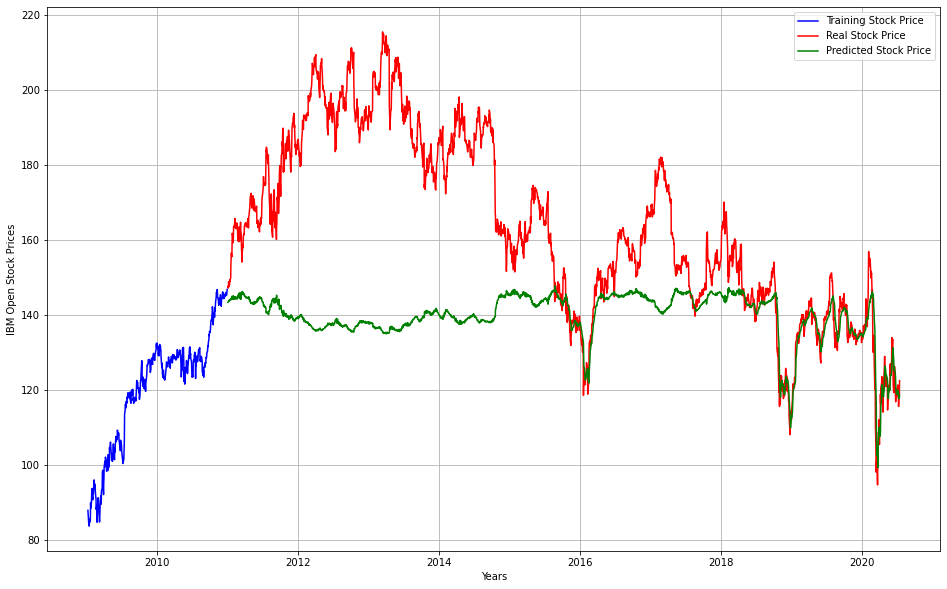

In [103]:
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('IBM Open Stock Prices')
plt.plot(train_stock['Date'].tail(500), train_stock['Open'].tail(500), 'b', label='Training Stock Price')
plt.plot(test_stock['Date'], test_stock['Open'], 'r', label='Real Stock Price')
plt.plot(test_stock['Date'], predicted_stock_price, 'g', label='Predicted Stock Price')
plt.legend()
plt.show()

### Calculating Accuracy

In [124]:
mean_sq_error = mean_squared_error(real_stock_price, predicted_stock_price)
mean_abs_error = mean_absolute_error(real_stock_price, predicted_stock_price)
root_mean_sq_error = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [109]:
print('Mean Squared Error: {}'.format(mean_sq_error))

Mean Squared Error: 1117.6265219348923


In [110]:
print('Mean Absolute Error: {}'.format(mean_abs_error))

Mean Absolute Error: 24.324093306837035


In [112]:
print('Root Mean Squared Error: {}'.format(root_mean_sq_error))

Root Mean Squared Error: 33.43092164351579


# Store Train/Test/Prediction in csv

In [115]:
train_stock.to_csv('IBM_Stock_Train.csv', index=False, encoding='utf-8')

In [118]:
predicted_stock_price.shape

(2399, 1)

In [120]:
test_stock['predicted_price'] = predicted_stock_price

In [122]:
test_stock.to_csv('IBM_Stock_Test_And_Predicted.csv', index=False, encoding='utf-8')